In [602]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [603]:
DataSet_file_path="C:/Users/Preetham Koundinya/sales_data_sample.csv"
df=pd.read_csv(DataSet_file_path)
print(df.head())

     SALES   ORDERDATE
0  2871.00   2-24-2003
1  2765.90  05-07-2003
2  3884.34  07-01-2003
3  3746.70   8-25-2003
4  5205.27  10-10-2003


In [604]:
df.dtypes

SALES        float64
ORDERDATE     object
dtype: object

In [605]:
df.isnull().sum()

SALES        0
ORDERDATE    0
dtype: int64

In [606]:
df['ORDERDATE']=pd.to_datetime(df.ORDERDATE, format='%m-%d-%Y')
df.sort_values(by='ORDERDATE',inplace=True)

In [607]:
df=df.groupby('ORDERDATE').sum()
df=df.resample(rule='MS').sum()
df1=df.copy()
df.head()

,SALES
ORDERDATE,
2003-01-01,129753.60
2003-02-01,140836.19
2003-03-01,174504.90
2003-04-01,201609.55
2003-05-01,192673.11


In [608]:
df.shape[0]

29

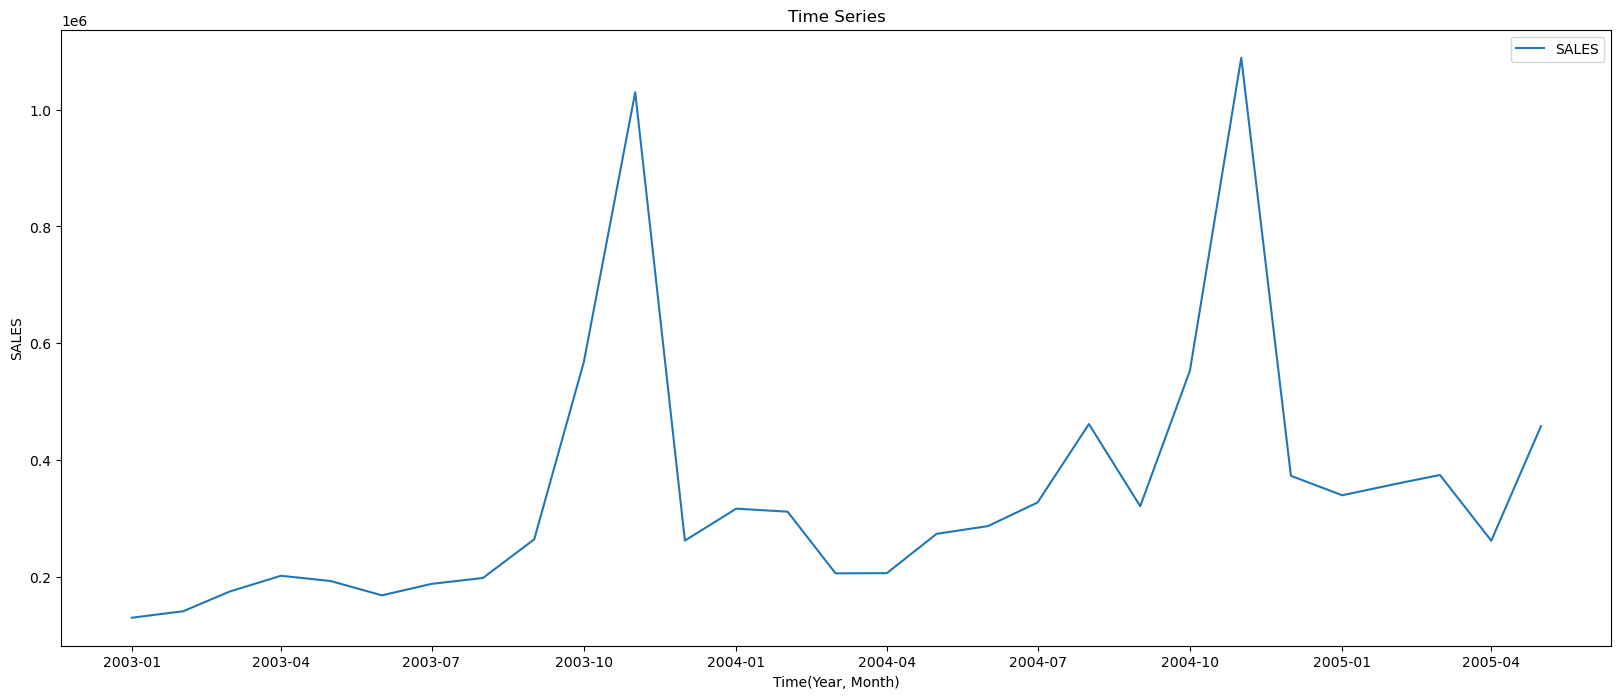

In [609]:
ts=df['SALES']
plt.figure(figsize = (20,8))
plt.plot(ts, label = 'SALES')
plt.title('Time Series')
plt.xlabel('Time(Year, Month)')
plt.ylabel("SALES")
plt.legend(loc = 'best')

In [552]:
def error_check(test,test_pred):
    return np.sqrt(mean_squared_error(test,test_pred))

# Modelling

In [553]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

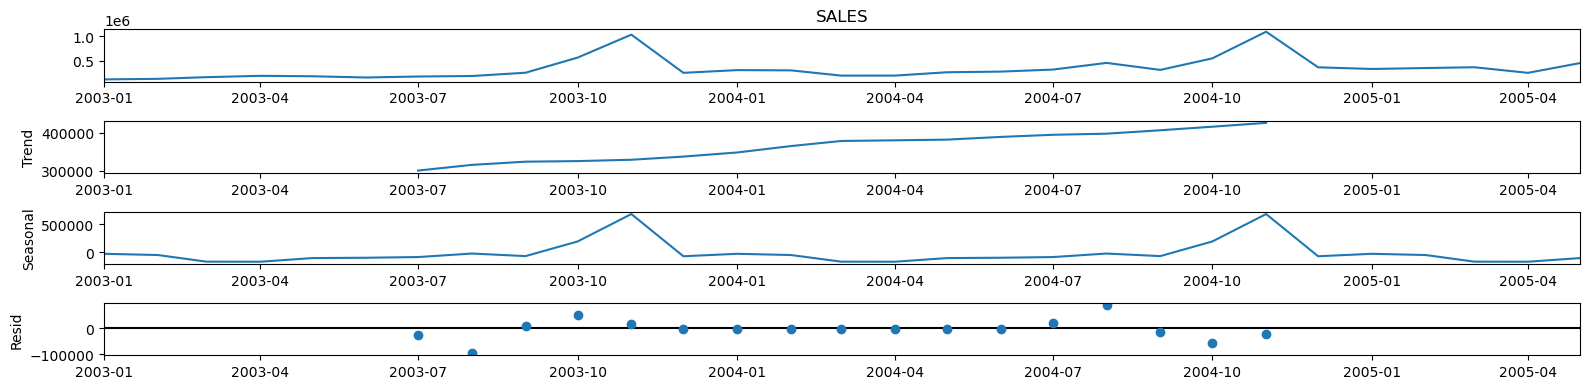

In [554]:
decomposition = sm.tsa.seasonal_decompose(ts,model='additive')
fig = decomposition.plot()

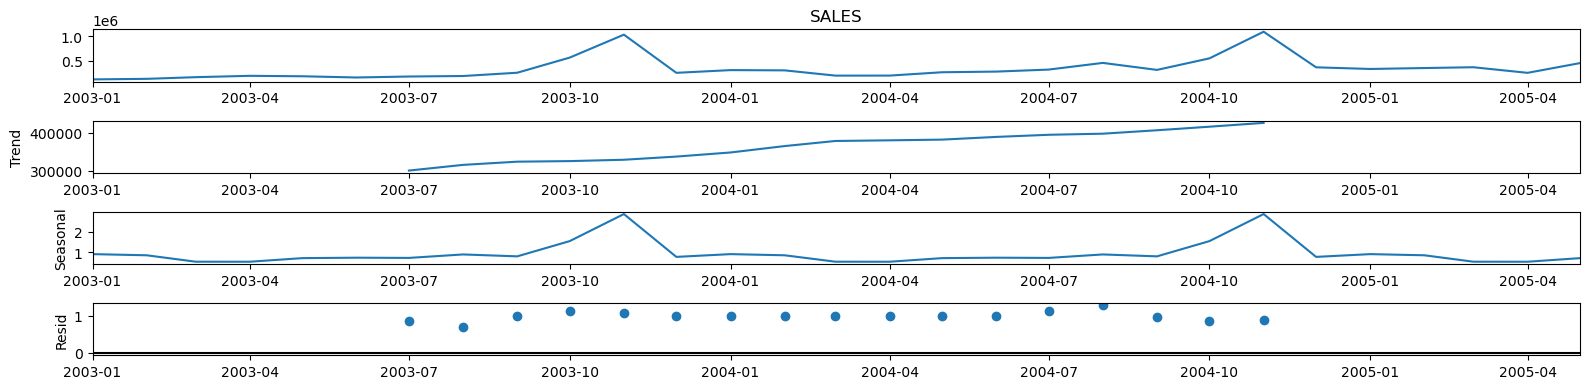

In [555]:
decomposition = sm.tsa.seasonal_decompose(ts,model='multiplicative')
fig = decomposition.plot()

# Train and test

In [556]:
train=df[:22]
test=df[22:]
print(train.tail())
test.tail()

                SALES
ORDERDATE            
2004-06-01  286674.22
2004-07-01  327144.09
2004-08-01  461501.27
2004-09-01  320750.91
2004-10-01  552924.25


,SALES
ORDERDATE,
2005-01-01,339543.42
2005-02-01,358186.18
2005-03-01,374262.76
2005-04-01,261633.29
2005-05-01,457861.06


# Model evaluation

<Axes: xlabel='ORDERDATE'>

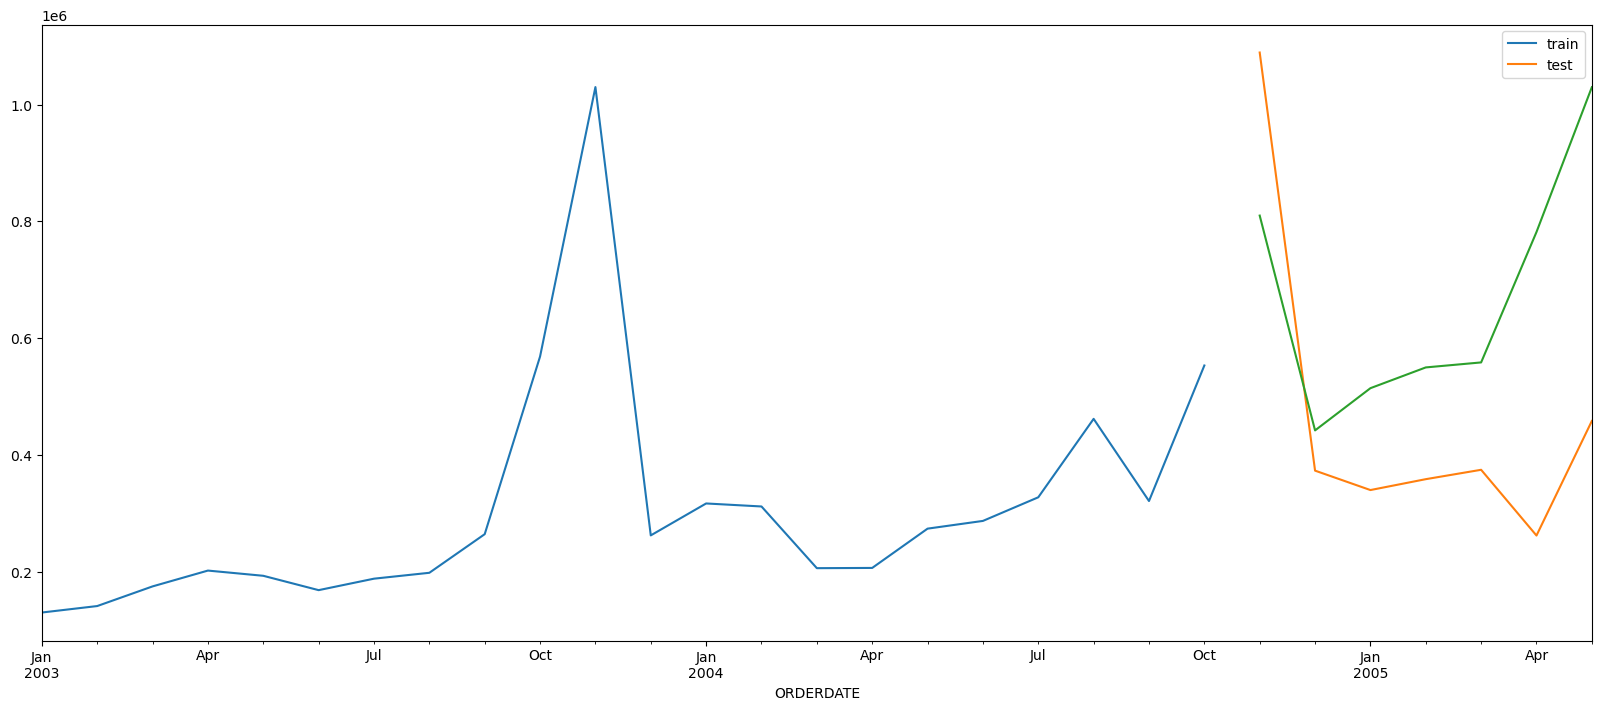

In [557]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
hwmodel=ExponentialSmoothing(train.SALES,trend='add',seasonal='add',seasonal_periods=6).fit()
test_pred=hwmodel.forecast(7)
train['SALES'].plot(legend=True,label='train',figsize=(20,8))
test['SALES'].plot(legend=True,label='test',figsize=(20,8))
test_pred.plot()

In [558]:
df.SALES.mean()

345952.71896551724

In [559]:
from sklearn.metrics import mean_squared_error
print(error_check(test,test_pred))

334014.090125789


<Axes: xlabel='ORDERDATE'>

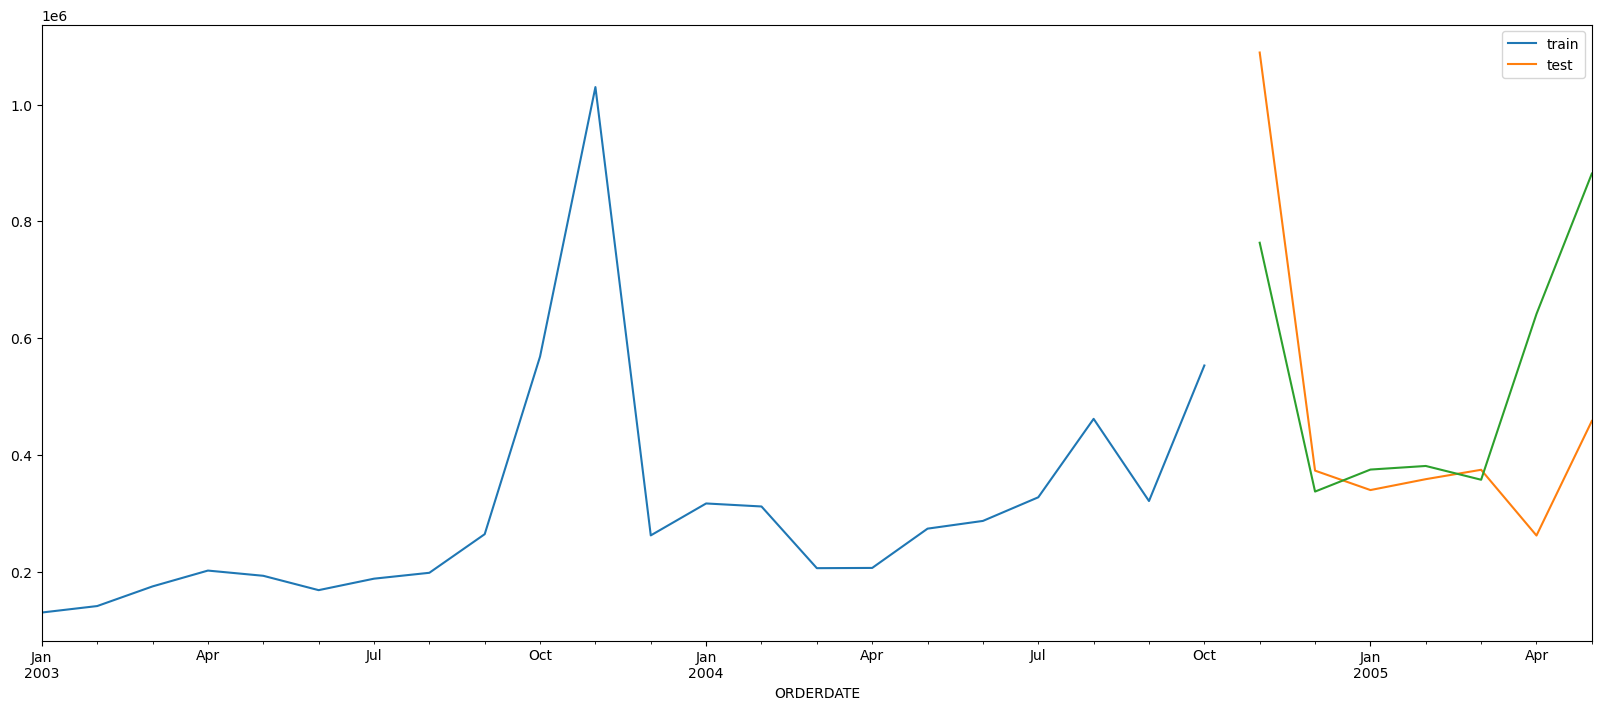

In [560]:
hwmodel1=ExponentialSmoothing(train.SALES,trend='add',seasonal='mul',seasonal_periods=6).fit()
test_pred1=hwmodel1.forecast(7)
train['SALES'].plot(legend=True,label='train',figsize=(20,8))
test['SALES'].plot(legend=True,label='test',figsize=(20,8))
test_pred1.plot()

In [561]:
from sklearn.metrics import mean_squared_error
print(error_check(test,test_pred1))

248753.11887005632


Forecast for entire model with holt's winter :

In [562]:
hwmodel=ExponentialSmoothing(df.SALES,trend='add',seasonal='add',seasonal_periods=6).fit()
pred=hwmodel.forecast(10)

<Axes: xlabel='ORDERDATE'>

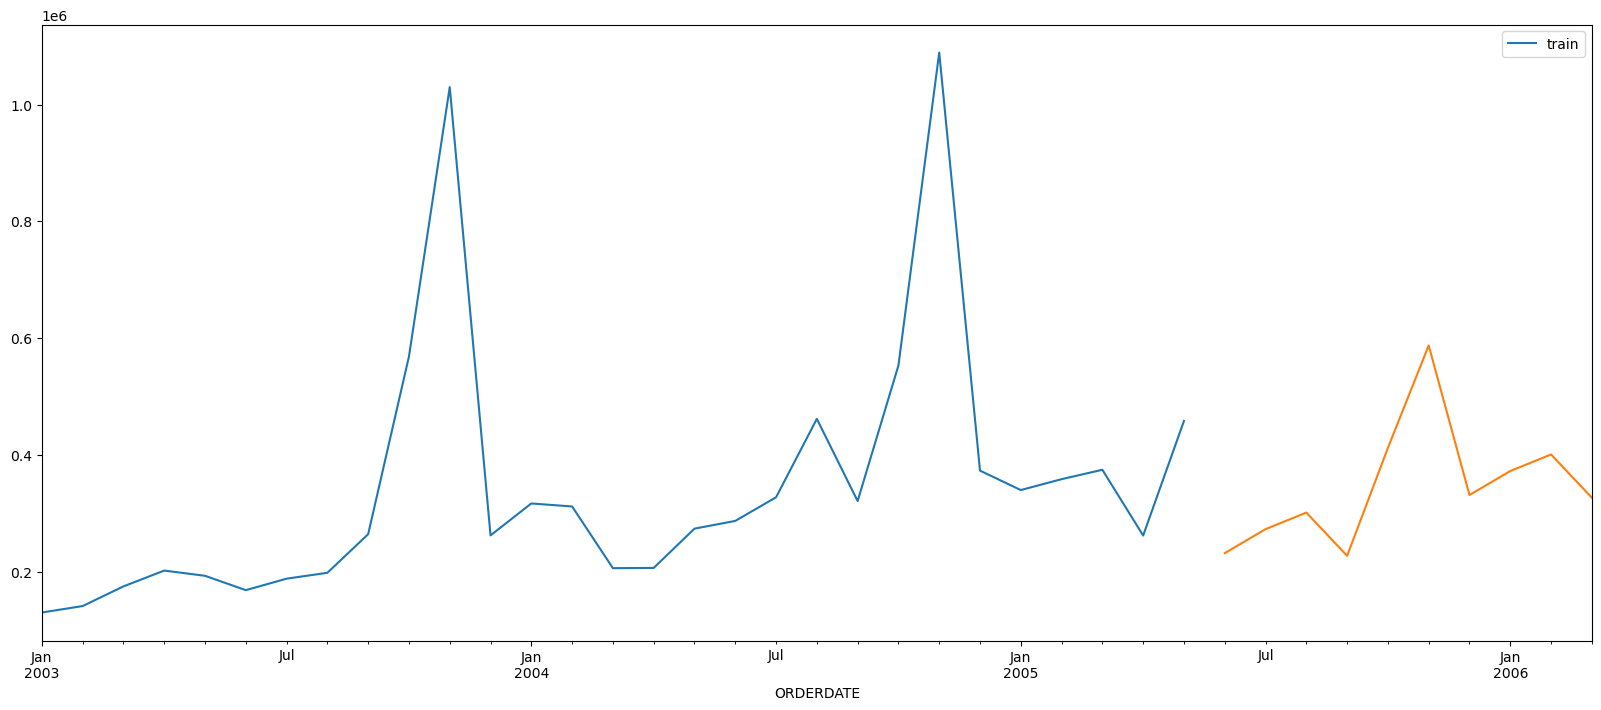

In [563]:
df['SALES'].plot(legend=True,label='train',figsize=(20,8))
pred.plot()

# Moving average

<Axes: xlabel='ORDERDATE'>

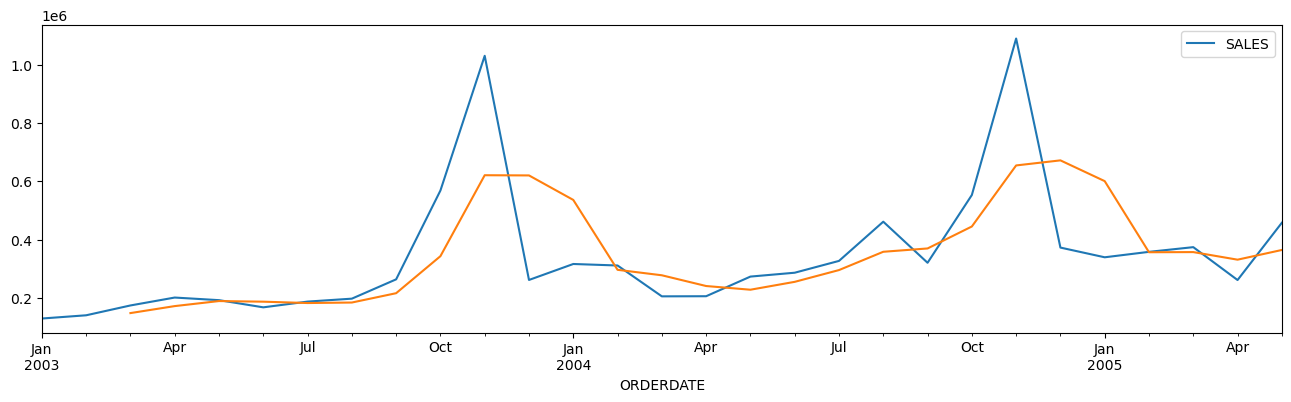

In [564]:
df.plot()
MOV = df['SALES'].rolling(window=3).mean()
MOV.plot()

In [565]:
#removing null values and checking for error
mov=MOV.iloc[3:]
p=df.iloc[3:]
print(error_check(p,mov))

174718.3139450112


In [566]:
df.SALES.mean()

345952.71896551724

## ARIMA

In [567]:
from statsmodels.tsa.stattools import adfuller #judges if the dataset is stationary or not

In [568]:
from statsmodels.tsa.arima.model import ARIMA

Stationarity Check:

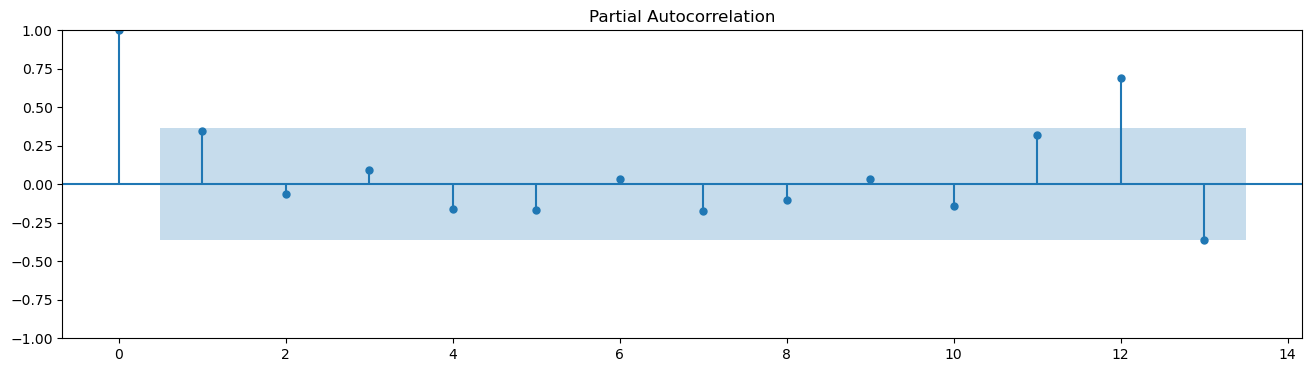

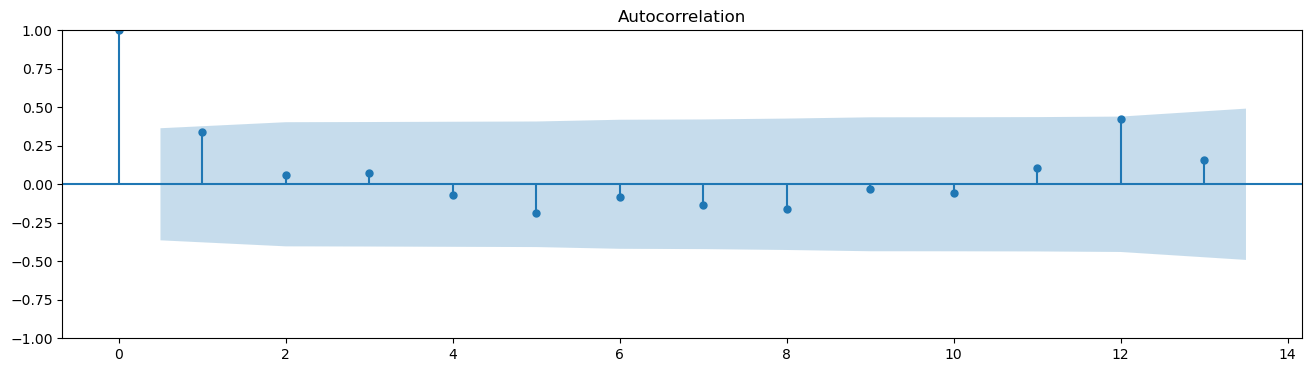

In [569]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
pacf = plot_pacf(df['SALES'],lags = 13)
acf = plot_acf(df['SALES'], lags = 13)

In [570]:
def ad_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("ADF : ",dftest[0])
    print("P - value: ", dftest[1]) #Probability
    print("Number of lags : ", dftest[2])
    print("No. of observations used for ADF regression and Critical values calculation : ",dftest[3])
    print("Critical Values : ")
    for key,val in dftest[4].items():
        print("\t", key,":", val)

In [571]:
ad_test(df['SALES']) #Augumented Dickey-Fuller test

ADF :  -3.6287831746232246
P - value:  0.005234006614207456
Number of lags :  0
No. of observations used for ADF regression and Critical values calculation :  28
Critical Values : 
	 1% : -3.6889256286443146
	 5% : -2.9719894897959187
	 10% : -2.6252957653061224


In [572]:
from pmdarima import auto_arima

In [573]:
stepwise_fit=auto_arima(df['SALES'],trace = True, supress_warnings = True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=805.101, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=800.778, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=799.279, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=799.237, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=834.174, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=801.197, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=801.565, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=803.175, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=824.214, Time=0.00 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.195 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   29
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -396.618
Date:                Fri, 07 Jul 2023   AIC                            799.237
Time:                        15:58:07   BIC                            803.339
Sample:                    01-01-2003   HQIC                           800.521
                         - 05-01-2005                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.564e+05   8.18e+04      4.355      0.000    1.96e+05    5.17e+05
ma.L1          0.3676      0.222      1.652      0.098      -0.068       0.804
sigma2      4.853e+10      0.324    1.5e+11      0.000    4.85e+10    4.85e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                24.93
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               2.72   Skew:                             1.73
Prob(H) (two-sided):                  0.13   Kurtosis:                         5.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.03e+27. Standard errors may be unstable.
"""

In [574]:
from statsmodels.tsa.arima.model import ARIMA

In [575]:
print(df.shape)
train=df.iloc[:-4]
test=df.iloc[-4:]
print(train.shape,test.shape)

(29, 1)
(25, 1) (4, 1)


Train the model

In [576]:
model = ARIMA(train['SALES'],order=(4,1,4))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  SALES   No. Observations:                   25
Model:                 ARIMA(4, 1, 4)   Log Likelihood                -330.495
Date:                Fri, 07 Jul 2023   AIC                            678.990
Time:                        15:58:10   BIC                            689.592
Sample:                    01-01-2003   HQIC                           681.803
                         - 01-01-2005                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3874      1.019     -1.361      0.174      -3.385       0.611
ar.L2         -0.8608      0.978     -0.880      0.379      -2.779       1.057
ar.L3          0.0919      0.715      0.129      0.898      -1.309       1.493
ar.L4          0.5533      0.522      1.060      0.289      -0.470       1.576
ma.L1          0.9394     77.268      0.012      0.990    -150.502     152.381
ma.L2          0.0004    152.155   2.34e-06      1.000    -298.217     298.218
ma.L3         -0.9657     75.103     -0.013      0.990    -148.165     146.234
ma.L4         -0.9732      1.034     -0.941      0.347      -3.000       1.054
sigma2      3.025e+10    1.6e-09    1.9e+19      0.000    3.03e+10    3.03e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 5.75
Prob(Q):                              0.73   Prob(JB):                         0.06
Heteroskedasticity (H):              19.80   Skew:                             0.91
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.4e+39. Standard errors may be unstable.
"""

Prediction

In [577]:
start = len(train)
end = len(test) + len(train) - 2
pred = model.predict(start=start,end=end,type = 'levels') #Mentioned from which part to which part the prediction should be done
pred.index=df.index[start:end+1]
pred

ORDERDATE
2005-02-01    452253.409879
2005-03-01    304105.158093
2005-04-01    255139.898288
Freq: MS, Name: predicted_mean, dtype: float64

<Axes: xlabel='ORDERDATE'>

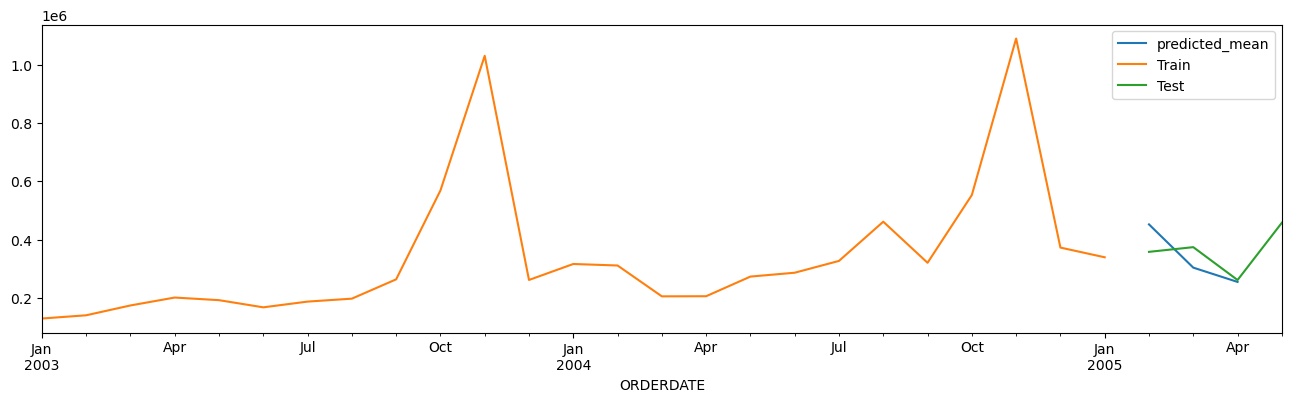

In [578]:
pred.plot(legend=True)
train['SALES'].plot(legend=True,label='Train')
test['SALES'].plot(legend=True,label='Test')

In [579]:
temp=test.iloc[:-1]
error_check(temp,pred)

67854.98502531601

In [580]:
model2 = ARIMA(train['SALES'],order=(4,1,4))
model2 = model2.fit()
df.tail()

,SALES
ORDERDATE,
2005-01-01,339543.42
2005-02-01,358186.18
2005-03-01,374262.76
2005-04-01,261633.29
2005-05-01,457861.06


In [581]:
pred=model2.predict(start=len(df),end=len(df)+6,type='levels').rename('ARIMA Predictions')
pred

2005-06-01    264340.414681
2005-07-01    276155.201768
2005-08-01    425653.254454
2005-09-01    306201.732201
2005-10-01    232749.824216
2005-11-01    457756.628580
2005-12-01    280543.683125
Freq: MS, Name: ARIMA Predictions, dtype: float64

<Axes: xlabel='ORDERDATE'>

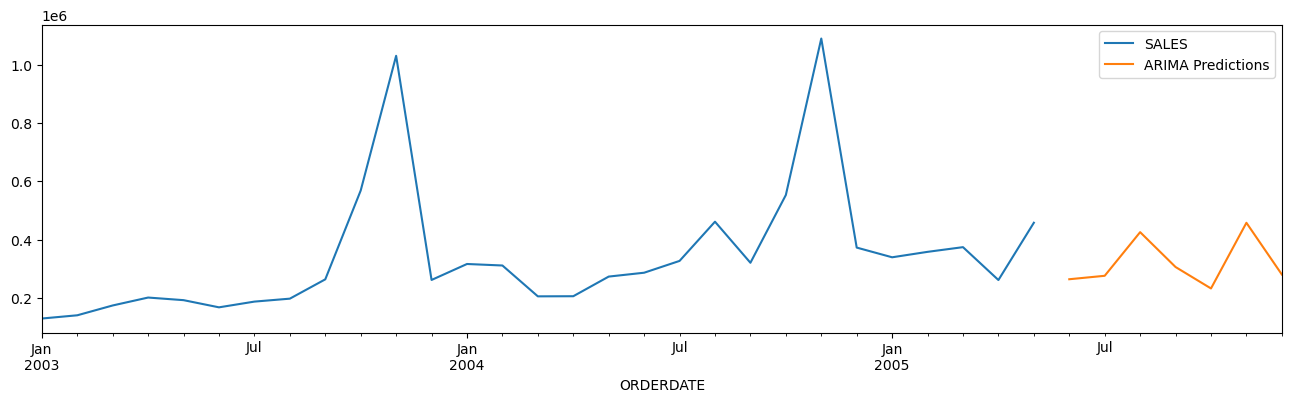

In [582]:
df.plot()
pred.plot(legend=True)

# SIMPLE LINEAR REGRESSION

In [610]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [611]:
#to make the model understand the relationship
df['Sales_last_month']=df['SALES'].shift(+1)
df['Sales_last_2months']=df['SALES'].shift(+2)
df

,SALES,Sales_last_month,Sales_last_2months
ORDERDATE,,,
2003-01-01,129753.60,NaN,NaN
2003-02-01,140836.19,129753.60,NaN
2003-03-01,174504.90,140836.19,129753.60
2003-04-01,201609.55,174504.90,140836.19
2003-05-01,192673.11,201609.55,174504.90
2003-06-01,168082.56,192673.11,201609.55
2003-07-01,187731.88,168082.56,192673.11
2003-08-01,197809.30,187731.88,168082.56
2003-09-01,263973.36,197809.30,187731.88


In [612]:
df=df.dropna()
df

,SALES,Sales_last_month,Sales_last_2months
ORDERDATE,,,
2003-03-01,174504.90,140836.19,129753.60
2003-04-01,201609.55,174504.90,140836.19
2003-05-01,192673.11,201609.55,174504.90
2003-06-01,168082.56,192673.11,201609.55
2003-07-01,187731.88,168082.56,192673.11
2003-08-01,197809.30,187731.88,168082.56
2003-09-01,263973.36,197809.30,187731.88
2003-10-01,568290.97,263973.36,197809.30
2003-11-01,1029837.66,568290.97,263973.36


In [613]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,max_features=3,random_state=1)

In [614]:
x1,x2,y=df['Sales_last_month'],df['Sales_last_2months'],df['SALES']
x1,x2,y=np.array(x1),np.array(x2),np.array(y)
x1,x2,y=x1.reshape(-1,1),x2.reshape(-1,1),y.reshape(-1,1) #how many ever the rows under 1 column
final_x=np.concatenate((x1,x2),axis=1)
final_x

array([[ 140836.19,  129753.6 ],
       [ 174504.9 ,  140836.19],
       [ 201609.55,  174504.9 ],
       [ 192673.11,  201609.55],
       [ 168082.56,  192673.11],
       [ 187731.88,  168082.56],
       [ 197809.3 ,  187731.88],
       [ 263973.36,  197809.3 ],
       [ 568290.97,  263973.36],
       [1029837.66,  568290.97],
       [ 261876.46, 1029837.66],
       [ 316577.42,  261876.46],
       [ 311419.53,  316577.42],
       [ 205733.73,  311419.53],
       [ 206148.12,  205733.73],
       [ 273438.39,  206148.12],
       [ 286674.22,  273438.39],
       [ 327144.09,  286674.22],
       [ 461501.27,  327144.09],
       [ 320750.91,  461501.27],
       [ 552924.25,  320750.91],
       [1089048.01,  552924.25],
       [ 372802.66, 1089048.01],
       [ 339543.42,  372802.66],
       [ 358186.18,  339543.42],
       [ 374262.76,  358186.18],
       [ 261633.29,  374262.76]])

In [626]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=final_x[:-16],final_x[-16:],y[:-16],y[-16:]

In [627]:
model.fit(X_train,y_train)
lr.fit(X_train,y_train)

LinearRegression()

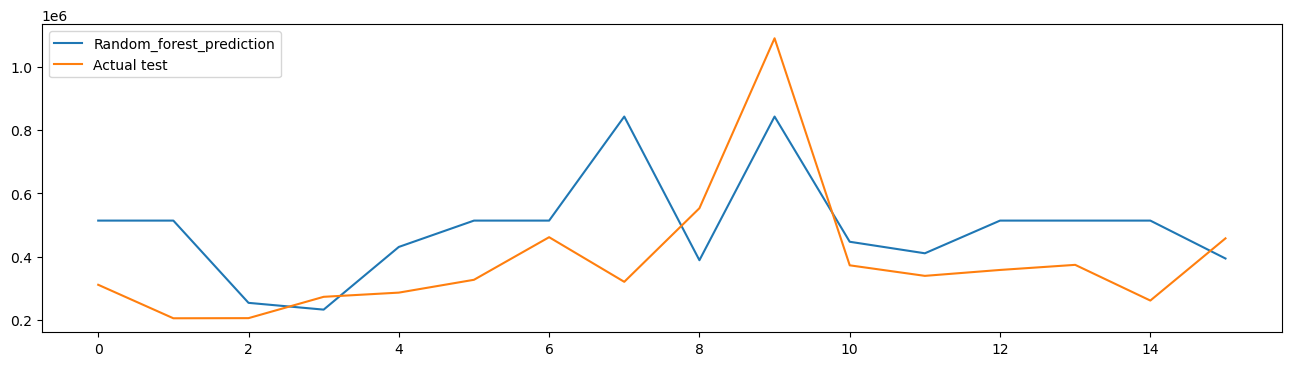

In [628]:
rf_pred=model.predict(x_test)
plt.rcParams['figure.figsize']=(16,4)
plt.plot(rf_pred,label='Random_forest_prediction')
plt.plot(y_test,label='Actual test')
plt.legend(loc='upper left')

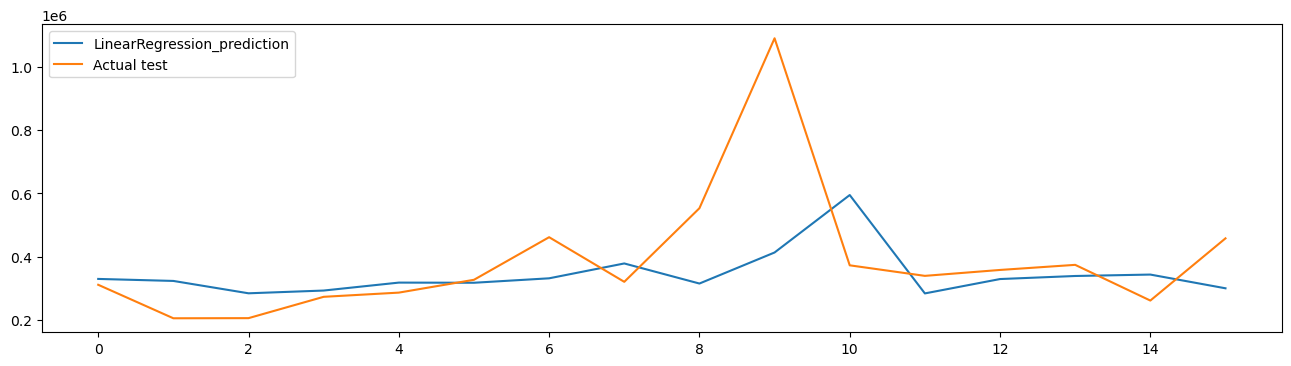

In [629]:
lr_pred=lr.predict(X_test)
plt.rcParams['figure.figsize']=(16,4)
plt.plot(lr_pred,label='LinearRegression_prediction')
plt.plot(y_test,label='Actual test')
plt.legend(loc='upper left')

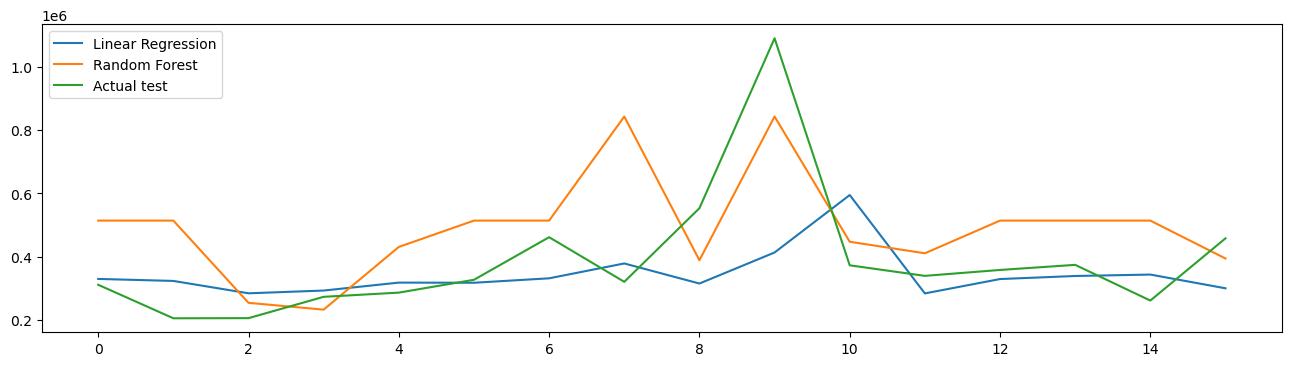

In [630]:
lr_pred=lr.predict(X_test)
plt.rcParams['figure.figsize']=(16,4)
plt.plot(lr_pred,label='Linear Regression')
plt.plot(rf_pred,label='Random Forest')
plt.plot(y_test,label='Actual test')
plt.legend(loc='upper left')

ERROR CHECK

In [631]:
error_check(y_test,rf_pred)

206152.13907000556

In [632]:
error_check(y_test,lr_pred)

200148.09649158258